## Day 26 Lecture 1 Assignment

In this assignment, we will learn about linear regression models and how to plot them using the sklearn library

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

In [3]:
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [4]:
# answer below:
#drop 'beer' column
lager = lager.drop(['beer'], axis=1)

Next check the data to make sure there is no missing data. Remove rows containing missing data if it exists.

In [5]:
# answer below:
#check for missing data
def missingness_summary(df,print_log,sort):
  percentage_null = df.isnull().sum()*100/df.isnull().count()
  if sort == 'ascending':
    return percentage_null.sort_values()
  elif sort == 'descending':
    return percentage_null.sort_values(ascending=False)
  else: 
    return percentage_null

lager_data = missingness_summary(lager,0,'ascending')
print(lager_data)

#shows no missing data

tpc     0.0
ma      0.0
dsa     0.0
asa     0.0
orac    0.0
rp      0.0
mca     0.0
dtype: float64


Plot the scatter matrix for all variables in the dataset. Do all variables have a pairwise linear relationship?

<function matplotlib.pyplot.show>

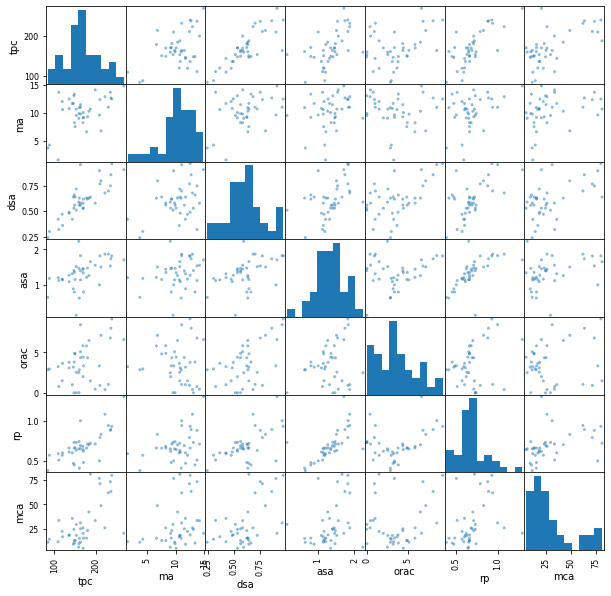

In [6]:
# answer below:
#pandas scatter_matrix plot for linear relation
pd.plotting.scatter_matrix(lager, figsize=(10,10))
plt.show

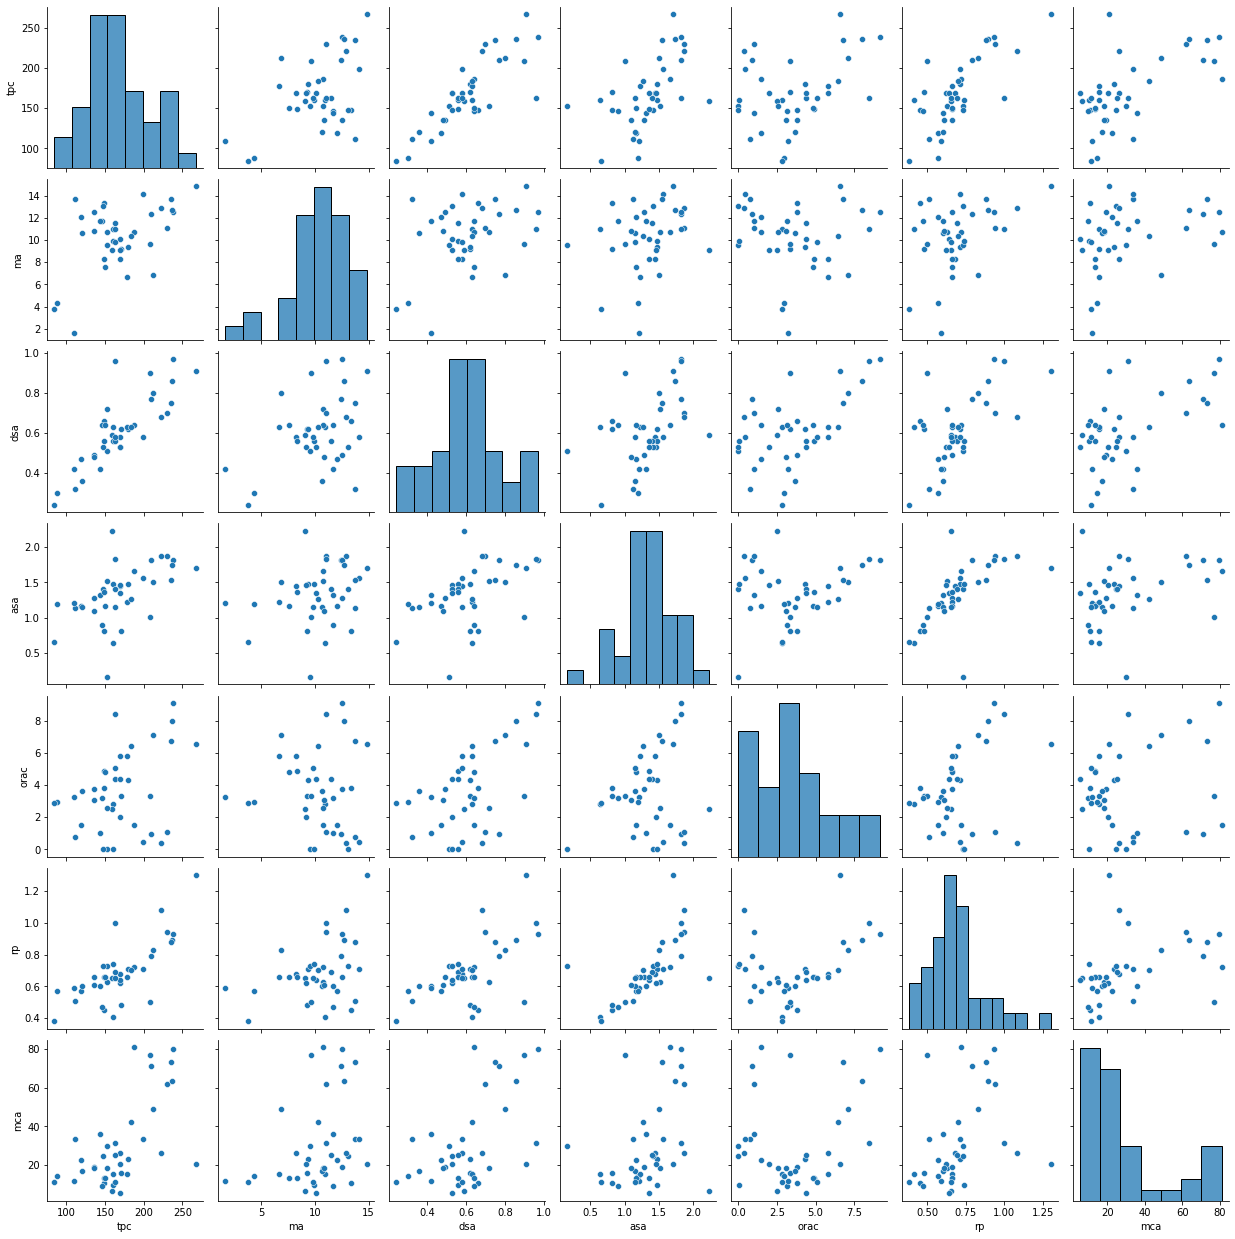

In [7]:
#seaborn pairplot showing scatter_matrix
import seaborn as sns
sns.pairplot(lager)
plt.show()

We would like to split the data into train and test samples. Use `tpc` as the y column and split the data with 25% of the data in the test sample.

In [8]:
# answer below:
#import train test split for splitting data
from sklearn.model_selection import train_test_split
X = lager.drop(['tpc'], axis=1)
y = lager['tpc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Using sklearn, train the model and print out the coefficients and intercept.

In [9]:
# answer below:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
#fit the model
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#print out coefficients and intercept
print('Coefficients: \n', linear.coef_)
print('Intercepts: \n', linear.intercept_)

Coefficients: 
 [  2.05405693 113.50780602  -2.47194404  -0.19738857  61.49728741
   0.40474555]
Intercepts: 
 27.491460080780797
